# Pharmaceuticals Inc.

# Analysis
1. as the tumor volume increse weight of mouse also increse.
2. Capomulin and Ramican drugs are more effective than Infubinol and Ceftamin.

# **Prepare the data**

In [1]:
#dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# path of data files using in clinical study
mouse_metadata_path = "../Pymaceuticals/data/Mouse_metadata.csv"
study_result_path = "../Pymaceuticals/data/Study_results.csv"

In [3]:
#read the mouse_metadata and study_result files
mouse_metadata=pd.read_csv(mouse_metadata_path)
study_result = pd.read_csv(study_result_path)

In [4]:
#Merge into single dataset
study_data=pd.merge(study_result,mouse_metadata,on = "Mouse ID",how="left")
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
#updated number of unique mice IDs
updated_mice_IDs =len(study_data['Mouse ID'].value_counts())
updated_mice_IDs

249

In [6]:
# Duplicate mice ID that shows up for Mouse ID and Timepoint
duplicated_ID = study_data.loc[study_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicated_ID

array(['g989'], dtype=object)

In [7]:
#Drop duplicate Mouse ID
clean_dataframe = study_data[study_data["Mouse ID"].isin(duplicated_ID)==False]
clean_dataframe.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
#number of mice in clean_dataframe
mice_number=len(clean_dataframe['Mouse ID'].value_counts())
mice_number

248

# Generate Summary Statistics

In [9]:
#statistics of the tumor volume for each regimen
mean= clean_dataframe["Tumor Volume (mm3)"].groupby(clean_dataframe['Drug Regimen']).mean()
median=clean_dataframe["Tumor Volume (mm3)"].groupby(clean_dataframe['Drug Regimen']).median()
variance=clean_dataframe["Tumor Volume (mm3)"].groupby(clean_dataframe['Drug Regimen']).var()
std_deviation=clean_dataframe["Tumor Volume (mm3)"].groupby(clean_dataframe['Drug Regimen']).std()
sem =clean_dataframe["Tumor Volume (mm3)"].groupby(clean_dataframe['Drug Regimen']).sem()


# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({ "mean_tumor_volume":mean,
                                   "median_tumor_volume":median,
                                   "variance_tumor_volume": variance,
                                   "std_deviation_tumor_volume" :std_deviation,
                                   "sem_tumor_volume" :sem,})
            
summary_statistics


,mean_tumor_volume,median_tumor_volume,variance_tumor_volume,std_deviation_tumor_volume,sem_tumor_volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Create Bar Charts and Pie Charts

# bar chart showing the total number of timepoints for all mice tested for each drug regimen with the Pandas method 

In [10]:
# creat dataframe for number of mice tested for each drug regimrn
mice_count = clean_dataframe["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

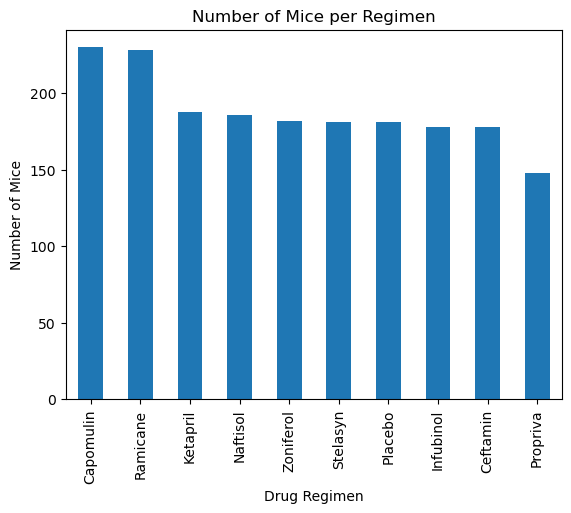

In [11]:
#Bar chart pandas method showing the total number of timepoints for all mice tested for each drug regimen 
mice_count.plot.bar(color='tab:blue')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Regimen")
plt.show()

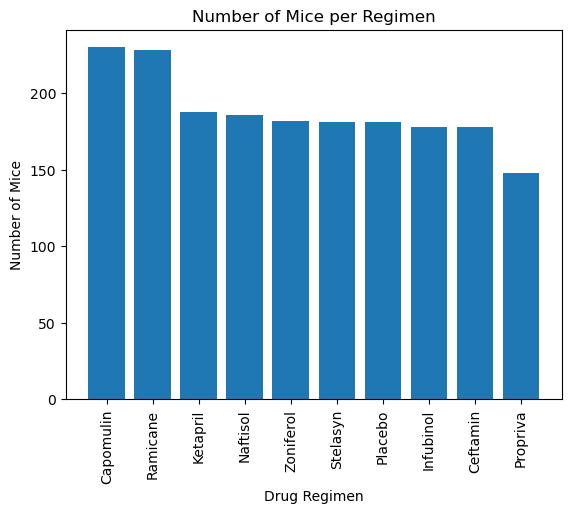

In [12]:
# bar chart matplotlib metod showing the total number of timepoints for all mice tested for each drug regimen 
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis,align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Regimen")
plt.xticks(rotation="vertical")
plt.show()

# pie chart showing the total number of timepoints for all mice tested for each drug regimen with the Pandas method 

In [13]:
#sex count data frame for pie chart
Sex_count=clean_dataframe['Sex'].value_counts()
Sex_count

Male      958
Female    922
Name: Sex, dtype: int64

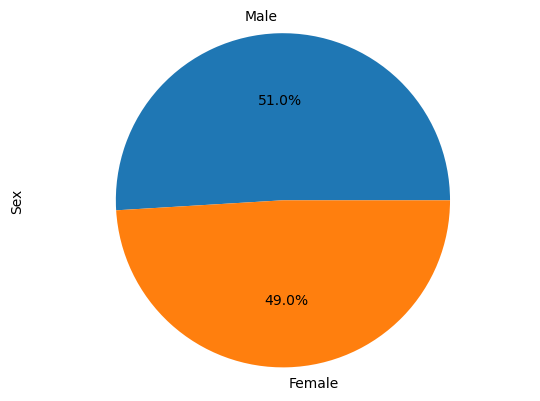

In [14]:
# pie chart Pandas method showing the total number of timepoints for all mice tested for each drug regimen
Sex_count.plot.pie(autopct= "%1.1f%%")
plt.axis("equal")
plt.show()

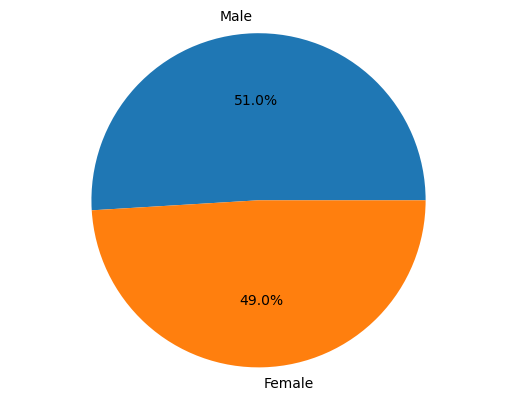

In [15]:
# pie chart Matplotlib's  method  showing the total number of timepoints for all mice tested for each drug regimen
labels = ['Male', 'Female']
sizes = [958,922]
plt.pie(sizes,labels=labels,autopct= "%1.1f%%")
plt.axis("equal")
plt.show()

# Calculate Quartiles, Find Outliers, and Create a Box Plot 

In [16]:
# Find max timepoint for each mouse

max_timepoint= pd.DataFrame(clean_dataframe.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_timepoint

# Merge max timepoint and clean_dataframe
merged_df = pd.merge(clean_dataframe, max_timepoint, on='Mouse ID')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Create subset dataframe representing only the four following drug regimens

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


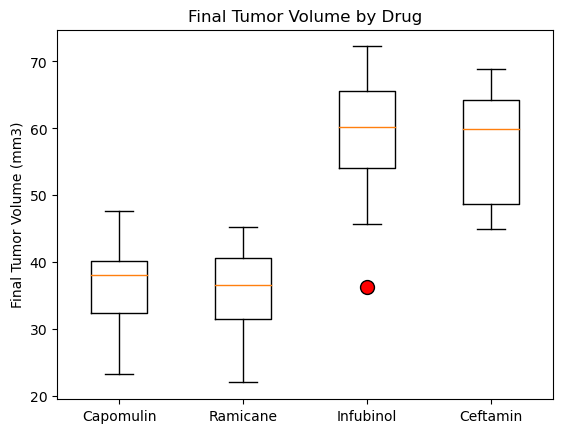

In [18]:
# Edit outliers on boxplot
flierprops = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')

# Plot boxplot
plt.boxplot(drug_values, flierprops=flierprops)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

# Create a Line Plot and a Scatter Plot

In [19]:
#Identify data points of a mouse treated with Capomulin
Capomulin_df = clean_dataframe.loc[clean_dataframe['Mouse ID']=='l509']
Capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21


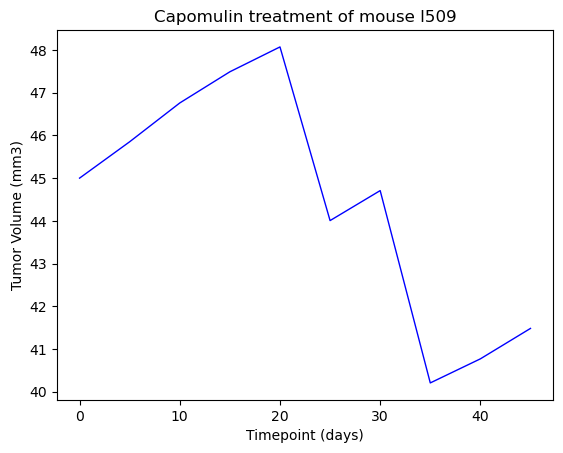

In [20]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = Capomulin_df['Timepoint']
y_axis = Capomulin_df['Tumor Volume (mm3)']
plt.plot(x_axis,y_axis,linewidth=1,color="blue")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

In [21]:
# Isolate cases that only use the Capomulin regimen
capomulin = clean_dataframe.loc[clean_dataframe['Drug Regimen']=='Capomulin']
capomulin.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [22]:
# Find average tumor volume for each mouse
mean = capomulin.groupby(capomulin['Mouse ID'])['Tumor Volume (mm3)'].mean()

# Merge mean and clean_dataframe and drop duplicates
new_table = pd.merge(capomulin,mean,on='Mouse ID')
final_avg_vol = new_table[['Weight (g)', 'Tumor Volume (mm3)_y']].drop_duplicates()
final_avg_vol

,Weight (g),Tumor Volume (mm3)_y
0,22,41.963636
10,21,43.216925
18,17,36.509212
28,17,34.559143
38,21,40.083699
48,15,36.182040
58,21,44.434474
68,23,42.803733
78,25,45.798970
82,17,39.887495


<function matplotlib.pyplot.show(close=None, block=None)>

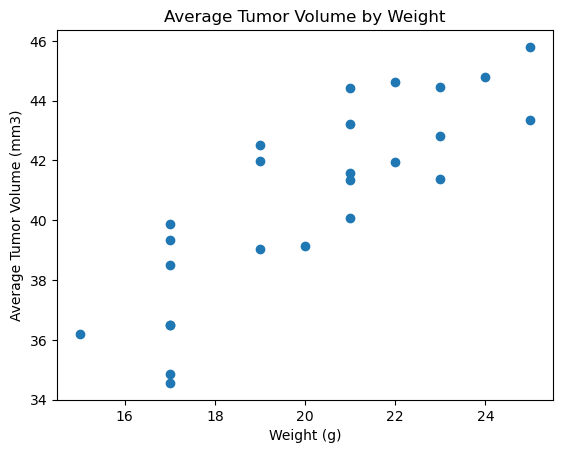

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_axis=final_avg_vol['Weight (g)']
y_axis=final_avg_vol['Tumor Volume (mm3)_y']
plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [24]:
# Duplicate code for scatter plot from above:
Capomulin_df = clean_dataframe.loc[clean_dataframe['Mouse ID']=='l509']
mean = capomulin.groupby(capomulin['Mouse ID'])['Tumor Volume (mm3)'].mean()
new_table = pd.merge(capomulin,mean,on='Mouse ID')
final_avg_vol = new_table[['Weight (g)', 'Tumor Volume (mm3)_y']].drop_duplicates()
x_axis= final_avg_vol['Weight (g)']
y_axis= final_avg_vol['Tumor Volume (mm3)_y']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x_axis,y_axis)

# Print the answer to above calculation
print(f"""The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.""")



The correlation between mouse weight and the average tumor volume is 0.84.


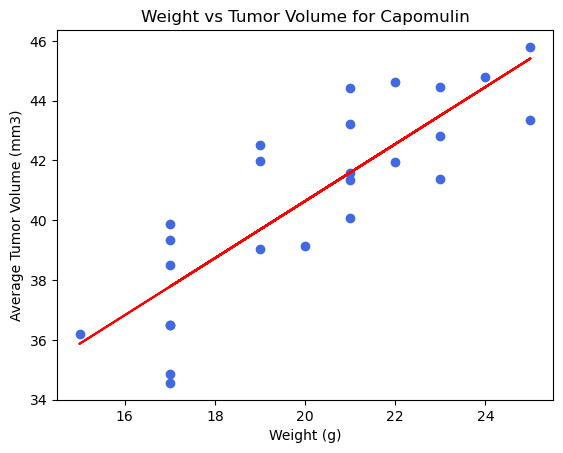

In [25]:
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(final_avg_vol['Weight (g)'],final_avg_vol['Tumor Volume (mm3)_y'])
regress_values=final_avg_vol['Weight (g)']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(final_avg_vol['Weight (g)'],final_avg_vol['Tumor Volume (mm3)_y'],color='royalblue')
plt.plot(final_avg_vol['Weight (g)'], regress_values, color='red')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()